In [1]:
import keras
from keras import models

In [2]:
## the model loaded here is a pretrained model to classify mnist dataset

model = keras.models.load_model("models/",)
model.trainable = False

In [3]:
import tensorflow as tf
(xtrain, ytrain), (xtest, ytest) = tf.keras.datasets.fashion_mnist.load_data()

In [4]:
import matplotlib.pyplot as plt

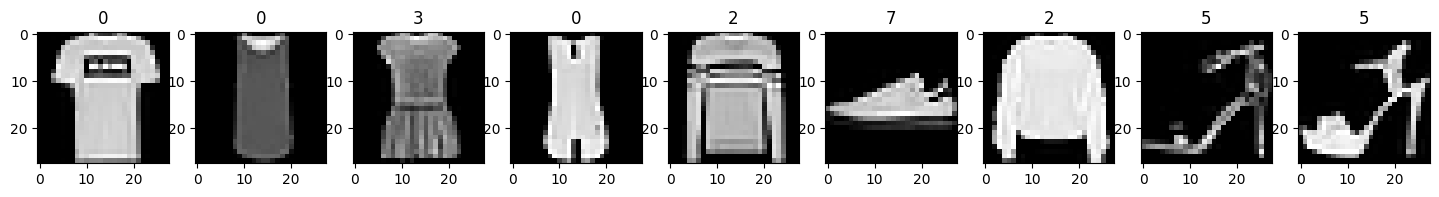

In [5]:
n = 10
plt.figure(figsize = (20, 4))
for i in range(1, n):
    ax = plt.subplot(1, n, i)
    plt.imshow(xtrain[i].reshape(28, 28))
    plt.gray()
    ax.title.set_text(ytrain[i])
plt.show()
    

In [6]:
from tensorflow.keras.utils import to_categorical

In [7]:
xtrain = xtrain.astype('float') / 255
xtest = xtest.astype('float') / 255

xtrain = xtrain.reshape(len(xtrain), 28, 28, 1)
xtest = xtest.reshape(len(xtest), 28, 28, 1)

In [8]:
ytrain = to_categorical(ytrain)
ytest = to_categorical(ytest)

In [9]:
xvalidation = xtrain[50000:]
yvalidation = ytrain[50000:]

xtrain = xtrain[:50000]
ytrain = ytrain[:50000]

In [10]:
model.trainable=False
x = model.layers[-3].output
# x = keras.layers.Dense(128, activation='relu')(x)
x = keras.layers.Dense(64, activation=tf.keras.layers.LeakyReLU(alpha=0.2))(x)
output = keras.layers.Dense(10, activation='softmax')(x)
tmodel = keras.Model(model.input, output)

In [11]:
tmodel.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_input (InputLayer)   [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928 

In [12]:
tmodel.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = tmodel.fit(xtrain, ytrain,
                    epochs=10,
                    batch_size=32,
                    validation_data=(xvalidation, yvalidation))

Epoch 1/10
1563/1563 [==============================] - 17s 10ms/step - loss: 0.5536 - accuracy: 0.8080 - val_loss: 0.4644 - val_accuracy: 0.8332
Epoch 2/10
1563/1563 [==============================] - 15s 9ms/step - loss: 0.4281 - accuracy: 0.8488 - val_loss: 0.4263 - val_accuracy: 0.8478
Epoch 3/10
1563/1563 [==============================] - 15s 9ms/step - loss: 0.3973 - accuracy: 0.8584 - val_loss: 0.4160 - val_accuracy: 0.8529
Epoch 4/10
1563/1563 [==============================] - 15s 10ms/step - loss: 0.3798 - accuracy: 0.8649 - val_loss: 0.4418 - val_accuracy: 0.8412
Epoch 5/10
1563/1563 [==============================] - 15s 10ms/step - loss: 0.3673 - accuracy: 0.8699 - val_loss: 0.3985 - val_accuracy: 0.8574
Epoch 6/10
1563/1563 [==============================] - 15s 9ms/step - loss: 0.3563 - accuracy: 0.8740 - val_loss: 0.3973 - val_accuracy: 0.8598
Epoch 7/10
1563/1563 [==============================] - 15s 9ms/step - loss: 0.3473 - accuracy: 0.8754 - val_loss: 0.3982 - val

In [13]:
test_loss, test_acc = tmodel.evaluate(xtest, ytest)
print('Accuracy:', test_acc)
print('Loss: ', test_loss)

313/313 [==============================] - 2s 7ms/step - loss: 0.4261 - accuracy: 0.8493
Accuracy: 0.8493000268936157
Loss:  0.42614439129829407


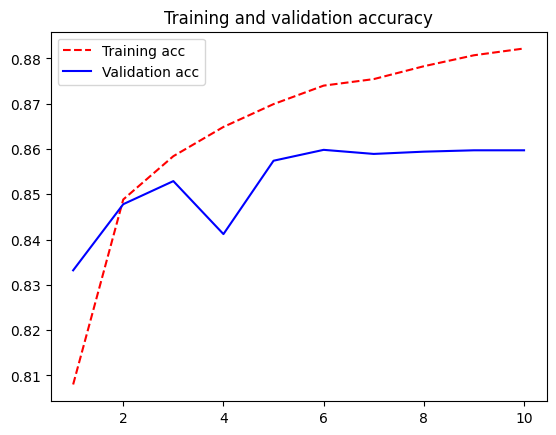

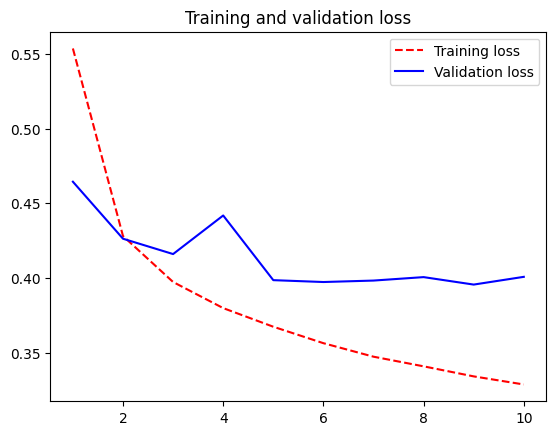

In [14]:
def plot_accuracy_and_loss(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, '--r', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.show()

    plt.plot(epochs, loss, '--r', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()

plot_accuracy_and_loss(history)

 ## Now let's classify the same digits

In [15]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

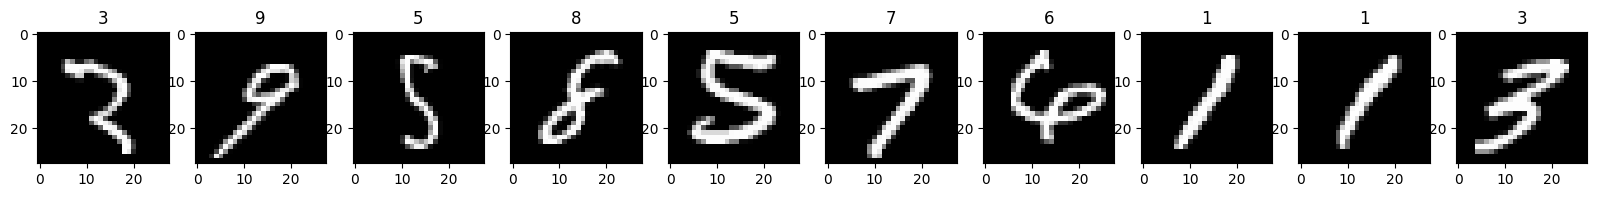

In [16]:
n = 10
plt.figure(figsize=(20, 4))

start = 500
for i in range(start, start + n):
    ax = plt.subplot(1, n, i+1-start)
    plt.imshow(x_train[i].reshape(28, 28))
    plt.gray()
    ax.title.set_text(y_train[i])
plt.show()    

In [17]:
x_train = x_train.astype('float') / 255
x_test = x_test.astype('float') / 255

x_train = x_train.reshape(len(x_train), 28, 28, 1)
x_test = x_test.reshape(len(x_test), 28, 28, 1)

In [18]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [19]:
x_validation = x_train[50000:]
y_validation = y_train[50000:]

x_train = x_train[:50000]
y_train = y_train[:50000]


In [20]:
# model
y = model.layers[-3].output
# y = keras.layers.Dense(128, activation=tf.keras.layers.LeakyReLU(alpha=0.2))(y)
y = keras.layers.Dense(128, activation='relu')(y)
output = keras.layers.Dense(10, activation='softmax')(y)
dmodel = keras.Model(model.input, output)
dmodel.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_input (InputLayer)   [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          3692

In [21]:
dmodel.compile(optimizer = 'rmsprop',
               loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [22]:
d_history = dmodel.fit(x_train, y_train,
              epochs = 10,
              batch_size = 128,
              validation_data = (x_validation, y_validation))

Epoch 1/10
391/391 [==============================] - 9s 22ms/step - loss: 0.0664 - accuracy: 0.9851 - val_loss: 0.0314 - val_accuracy: 0.9907
Epoch 2/10
391/391 [==============================] - 7s 19ms/step - loss: 0.0161 - accuracy: 0.9950 - val_loss: 0.0316 - val_accuracy: 0.9914
Epoch 3/10
391/391 [==============================] - 8s 19ms/step - loss: 0.0117 - accuracy: 0.9964 - val_loss: 0.0327 - val_accuracy: 0.9917
Epoch 4/10
391/391 [==============================] - 7s 19ms/step - loss: 0.0096 - accuracy: 0.9970 - val_loss: 0.0331 - val_accuracy: 0.9912
Epoch 5/10
391/391 [==============================] - 7s 19ms/step - loss: 0.0081 - accuracy: 0.9977 - val_loss: 0.0341 - val_accuracy: 0.9928
Epoch 6/10
391/391 [==============================] - 7s 19ms/step - loss: 0.0069 - accuracy: 0.9979 - val_loss: 0.0357 - val_accuracy: 0.9923
Epoch 7/10
391/391 [==============================] - 7s 19ms/step - loss: 0.0055 - accuracy: 0.9985 - val_loss: 0.0331 - val_accuracy: 0.9927

In [23]:
test_loss, test_acc = dmodel.evaluate(x_test, y_test)
print('Accuracy:', test_acc)
print('Loss: ', test_loss)

313/313 [==============================] - 2s 8ms/step - loss: 0.0341 - accuracy: 0.9930
Accuracy: 0.9929999709129333
Loss:  0.034126680344343185


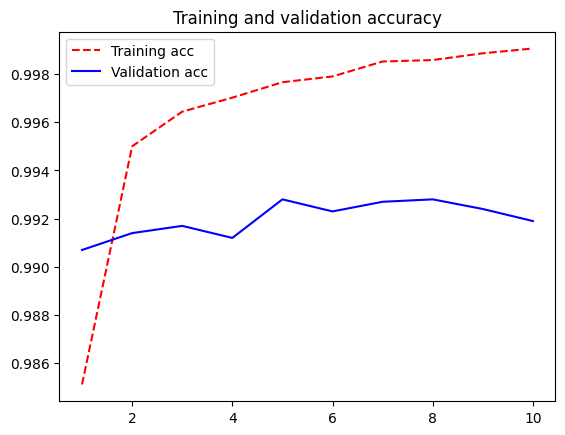

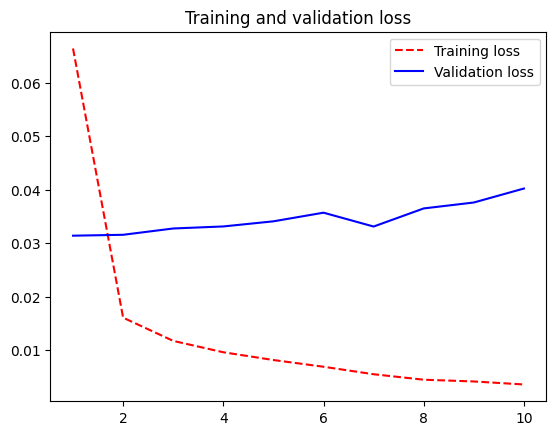

In [24]:
def plot_accuracy_and_loss(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, '--r', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.show()

    plt.plot(epochs, loss, '--r', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()

plot_accuracy_and_loss(d_history)